In [1]:
import numpy as nb

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 

In [3]:
comments = pd.read_csv ('UScomments.csv' , engine='python' , on_bad_lines='skip')

In [4]:
comments.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [5]:
comments.dropna(inplace=True)

In [6]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [7]:
!pip install textblob

In [8]:
from textblob import TextBlob

In [9]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity

0.0

In [10]:
sample_df= comments[0:1000]

In [11]:
sample_df.shape

(1000, 4)

In [12]:
polarity = []
for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [13]:
len(polarity)

691369

In [14]:
comments['polarity'] =  polarity

In [15]:
filter1 = comments['polarity']==1

In [16]:
comments_positive=comments[filter1]

In [17]:
filter2 = comments['polarity']==-1

In [18]:
comments_negative=comments[filter2]

In [19]:
!pip install wordcloud

In [20]:
from wordcloud import WordCloud , STOPWORDS

In [21]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [22]:
total_comments_positive = ' '.join(comments_positive['comment_text'])

In [23]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)

(-0.5, 399.5, 199.5, -0.5)

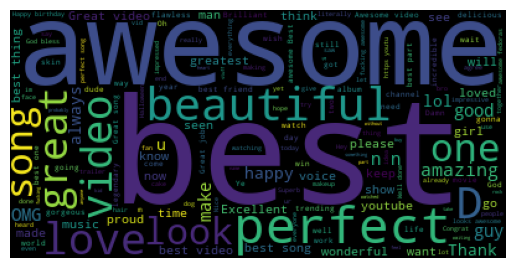

In [24]:
plt.imshow(wordcloud)
plt.axis('off')

In [25]:
total_comments_negative = ' '.join(comments_negative['comment_text'])

In [26]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_negative)

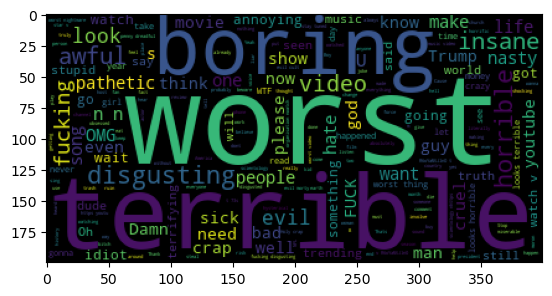

In [27]:
plt.imshow(wordcloud)

In [28]:
! pip install emoji==2.2.0

In [29]:
import emoji

In [30]:
comments['comment_text'].head(6)  

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
5                              #1 on trending AYYEEEEE
Name: comment_text, dtype: object

In [31]:
comment = 'trending 😉'

In [32]:
[char for char in comment if char in emoji.EMOJI_DATA]

['😉']

In [33]:
all_emoji_list = []
for comment in comments ['comment_text'].dropna():
    for char in comment: 
        if char in emoji.EMOJI_DATA:
            all_emoji_list.append(char)

In [34]:
all_emoji_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [35]:
from collections import Counter

In [36]:
Counter(all_emoji_list).most_common(10)

[('😂', 36998),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5721),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5362),
 ('💕', 5147)]

In [37]:
Counter(all_emoji_list).most_common(10)[0]

('😂', 36998)

In [38]:
Counter(all_emoji_list).most_common(10)[0][1]

36998

In [39]:
Counter(all_emoji_list).most_common(10)[3][0]

'🔥'

In [40]:
Counter(all_emoji_list).most_common(10)[2][0]

'❤'

In [41]:
emojis = [Counter(all_emoji_list).most_common(10)[i][0] for i in range (10)]

In [42]:
emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [43]:
Counter(all_emoji_list).most_common(10)[0][1]

36998

In [44]:
Counter(all_emoji_list).most_common(10)[1][1]

33453

In [45]:
Counter(all_emoji_list).most_common(10)[2][1]

31119

In [46]:
freqs = [Counter(all_emoji_list).most_common(10)[i][1] for i in range (10)]

In [47]:
freqs

[36998, 33453, 31119, 8694, 8398, 5721, 5545, 5476, 5362, 5147]

In [48]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [49]:
trace = go.Bar(x=emojis , y = freqs)

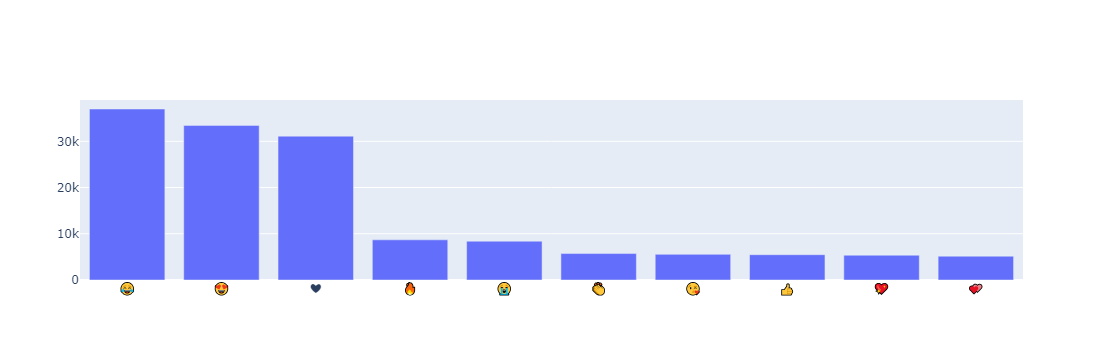

In [50]:
iplot([trace])

In [51]:
import os

In [52]:
files = os.listdir(r'C:\Users\bhanu\Downloads\additional_data-20241006T045903Z-001\additional_data')

In [58]:
[file for file in files if '.csv' in file]

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv',
 'youtube_sample.csv']

In [59]:
files_csv = [file for file in files if file.endswith('.csv') and file != 'youtube_sample.csv']

In [60]:
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [54]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [61]:
full_df = pd.DataFrame()
path = r'C:\Users\bhanu\Downloads\additional_data-20241006T045903Z-001\additional_data'
for file in files_csv:
    current_df = pd.read_csv(path+'/'+file , encoding = 'iso-8859-1' ,engine='python' , on_bad_lines='skip')
    full_df = pd.concat([full_df , current_df] , ignore_index = True)

In [62]:
full_df.shape

(239800, 16)

In [63]:
full_df[full_df.duplicated()].shape

(33273, 16)

In [64]:
full_df = full_df.drop_duplicates()

In [65]:
full_df.shape

(206527, 16)

In [66]:
full_df[0:1000].to_csv(r'C:\Users\bhanu\Downloads\additional_data-20241006T045903Z-001\additional_data/youtube_sample.csv', index=False)

In [67]:
full_df[0:1000].to_json(r'C:\Users\bhanu\Downloads\additional_data-20241006T045903Z-001\additional_data/youtube_sample.json')

#store in database

In [68]:
from sqlalchemy import create_engine

In [69]:
engine = create_engine(r'sqlite:///C:\Users\bhanu\Downloads\additional_data-20241006T045903Z-001\additional_data/youtube_sample.sqlite')

In [70]:
full_df[0:1000].to_sql('Users' , con=engine , if_exists = 'append')

1000

In [71]:
json_df = pd.read_json(r'C:\Users\bhanu\Downloads\additional_data-20241006T045903Z-001\additional_data\US_category_id.json')

In [72]:
json_df['items']

0     {'kind': 'youtube#videoCategory', 'etag': '"m2...
1     {'kind': 'youtube#videoCategory', 'etag': '"m2...
2     {'kind': 'youtube#videoCategory', 'etag': '"m2...
3     {'kind': 'youtube#videoCategory', 'etag': '"m2...
4     {'kind': 'youtube#videoCategory', 'etag': '"m2...
5     {'kind': 'youtube#videoCategory', 'etag': '"m2...
6     {'kind': 'youtube#videoCategory', 'etag': '"m2...
7     {'kind': 'youtube#videoCategory', 'etag': '"m2...
8     {'kind': 'youtube#videoCategory', 'etag': '"m2...
9     {'kind': 'youtube#videoCategory', 'etag': '"m2...
10    {'kind': 'youtube#videoCategory', 'etag': '"m2...
11    {'kind': 'youtube#videoCategory', 'etag': '"m2...
12    {'kind': 'youtube#videoCategory', 'etag': '"m2...
13    {'kind': 'youtube#videoCategory', 'etag': '"m2...
14    {'kind': 'youtube#videoCategory', 'etag': '"m2...
15    {'kind': 'youtube#videoCategory', 'etag': '"m2...
16    {'kind': 'youtube#videoCategory', 'etag': '"m2...
17    {'kind': 'youtube#videoCategory', 'etag': 

In [73]:
json_df['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [74]:
json_df['items'][2]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
 'id': '10',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Music',
  'assignable': True}}

In [75]:
json_df['items'][3]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"',
 'id': '15',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Pets & Animals',
  'assignable': True}}

In [76]:
cat_dict = {}
for item in json_df['items'].values:
    cat_dict[int(item['id'])] = item['snippet']['title']
  
    

In [77]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [78]:
full_df['category_id'].map(cat_dict)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
239789    NaN
239790    NaN
239791    NaN
239795    NaN
239799    NaN
Name: category_id, Length: 206527, dtype: object

In [79]:
# Display all values in the 'category_id' column
print(full_df['category_id'])


0         22
1         17
2         22
3         24
4          2
          ..
239789    10
239790     1
239791    28
239795    10
239799    22
Name: category_id, Length: 206527, dtype: object


In [80]:
# Find missing keys
missing_keys = set(full_df['category_id']) - set(cat_dict.keys())

# Print or log the missing keys
if missing_keys:
    print(f"Missing keys: {missing_keys}")


Missing keys: {'Yashma Gill as Erum (Shafaqâ\x80\x99s bhabhi)', '30', '28', ' Ñ\x82Ð°Ð½Ñ\x86Ñ\x83Ñ\x8eÑ\x89Ð¸Ñ\x85 Ð¸ Ð¿Ð°Ñ\x80Ð¾Ð´Ð¸Ñ\x80Ñ\x83Ñ\x8eÑ\x89Ð¸Ñ\x85 Ð°Ñ\x80Ñ\x82Ð¸Ñ\x81Ñ\x82Ð¾Ð² Ð² Ð\x9dÐ¾Ð²Ð¾Ð³Ð¾Ð´Ð½ÐµÐ¼ Ð¿Ð°Ñ\x80Ð°Ð´Ðµ Ð·Ð²ÐµÐ·Ð´', ' #LauraSmet', ' informed reporting of everything from wars and elections to championship games and royal weddings. AP is the largest and most trusted source of independent news and information.', ' Daniel Wu (AMCâ\x80\x99s â\x80\x9cInto the Badlandsâ\x80\x9d) and Oscar nominee Kristin Scott Thomas (â\x80\x9cThe English Patientâ\x80\x9d).', None, " lors d'un reporÂ\xadtage diffusÃ© sur LCI le 25 mai dernier.", ' with Oscar-winner Graham King (â\x80\x9cThe Departedâ\x80\x9d) producing under his GK Films banner.  The executive producers are Patrick McCormick', ' created RokShok the worldâ\x80\x99s first mobile phone case that conceals an engagement ring.', '43', ' die schmerzhafte Auswirkungen hat. Als Martha Kasimir wegen seines sonderbaren Verh

In [81]:
# Drop rows where 'category_id' is NaN and not in cat_dict
full_df_filtered = full_df[full_df['category_id'].notna() & full_df['category_id'].isin(cat_dict.keys())]


In [82]:
full_df_filtered['category_id'].unique()

array([1, 25, 24, 23, 10, 22, 19, 28, 27, 26, 43, 17, 29, 2, 15, 20, 30,
       44], dtype=object)

In [83]:
full_df2 = full_df_filtered

In [84]:
full_df2['category_id'].unique()

array([1, 25, 24, 23, 10, 22, 19, 28, 27, 26, 43, 17, 29, 2, 15, 20, 30,
       44], dtype=object)

In [85]:
full_df2['category_name'] = full_df2['category_id'].map(cat_dict)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Film & Animation'),
  Text(1, 0, 'News & Politics'),
  Text(2, 0, 'Entertainment'),
  Text(3, 0, 'Comedy'),
  Text(4, 0, 'Music'),
  Text(5, 0, 'People & Blogs'),
  Text(6, 0, 'Travel & Events'),
  Text(7, 0, 'Science & Technology'),
  Text(8, 0, 'Education'),
  Text(9, 0, 'Howto & Style'),
  Text(10, 0, 'Shows'),
  Text(11, 0, 'Sports'),
  Text(12, 0, 'Nonprofits & Activism'),
  Text(13, 0, 'Autos & Vehicles'),
  Text(14, 0, 'Pets & Animals'),
  Text(15, 0, 'Gaming'),
  Text(16, 0, 'Movies'),
  Text(17, 0, 'Trailers')])

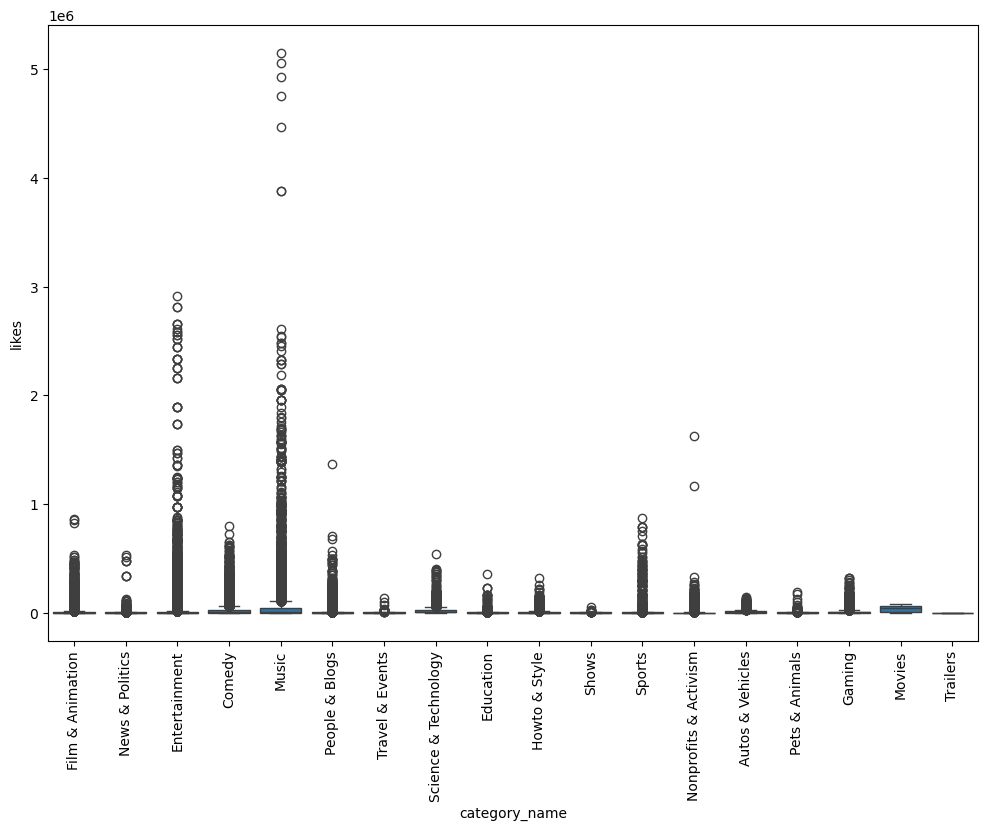

In [86]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name' , y='likes', data= full_df2)
plt.xticks(rotation = 'vertical')

In [87]:
full_df2['likes']

57238     33966
57239       735
57240      2011
57241     70353
57242       492
          ...  
230864     3806
230865     5893
230866     4659
230868      793
230869     7708
Name: likes, Length: 160183, dtype: object

In [88]:
full_df2.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name'],
      dtype='object')

In [89]:
full_df2['likes'] = pd.to_numeric(full_df2['likes'], errors='coerce')
full_df2['views'] = pd.to_numeric(full_df2['views'], errors='coerce')

In [90]:
(full_df2['likes'] / full_df2['views']) * 100

57238      3.098163
57239      0.124555
57240      0.424272
57241      5.661393
57242      0.106031
            ...    
230864     5.386815
230865     4.551001
230866     4.698325
230868     5.574692
230869    14.726786
Length: 160183, dtype: float64

In [91]:
full_df2['dislikes'] = pd.to_numeric(full_df2['dislikes'], errors='coerce')
full_df2['comment_count'] = pd.to_numeric(full_df2['comment_count'], errors='coerce')

In [92]:
full_df2['like_rate'] = (full_df2['likes'] / full_df2['views']) * 100
full_df2['dislike_rate'] = (full_df2['dislikes'] / full_df2['views']) * 100
full_df2['comment_count_rate'] = (full_df2['comment_count'] / full_df2['views']) * 100

In [93]:
full_df2.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

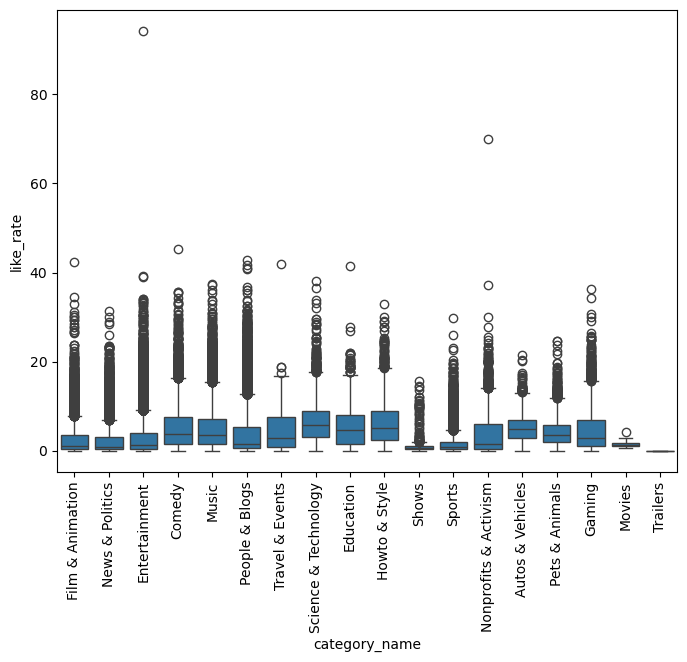

In [94]:
plt.figure(figsize=(8,6))
sns.boxplot(x='category_name' , y='like_rate', data= full_df2)
plt.xticks(rotation = 'vertical')
plt.show()

<Axes: xlabel='views', ylabel='likes'>

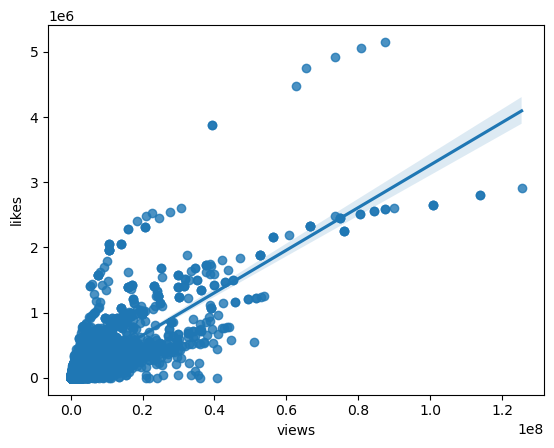

In [95]:
sns.regplot(x = 'views' ,y= 'likes' , data = full_df2)

In [96]:
full_df2[['views', 'likes', 'dislikes']].corr()

views     likes  dislikes
views     1.000000  0.814212  0.546661
likes     0.814212  1.000000  0.447204
dislikes  0.546661  0.447204  1.000000

<Axes: >

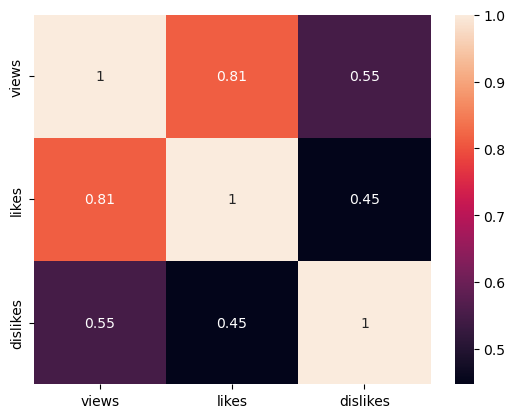

In [97]:
sns.heatmap(full_df2[['views', 'likes', 'dislikes']].corr() , annot = True)

In [102]:
full_df2 ['channel_title'].value_counts()

channel_title
VikatanTV             208
SAB TV                206
ETV Plus India        206
etvteluguindia        205
Study IQ education    202
                     ... 
73M Vistas              1
Terry                   1
World dance tv          1
Estos Manes             1
Tubus Show              1
Name: count, Length: 22972, dtype: int64

In [104]:
cdf = full_df2.groupby(['channel_title']).size().sort_values(ascending=False).reset_index()

In [108]:
cdf = cdf.rename(columns={0:'total_videos'})

In [106]:
import plotly.express as px

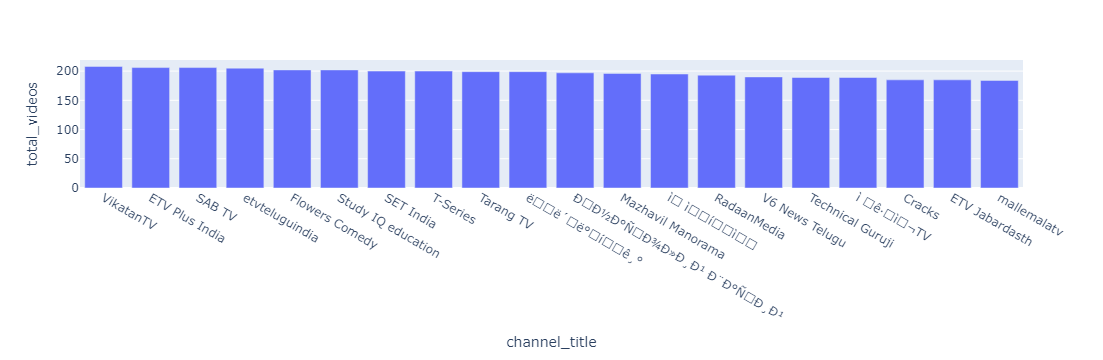

In [109]:
px.bar(data_frame=cdf[0:20], x = 'channel_title', y = 'total_videos')

In [114]:
full_df2['title'].iloc[0]  # Access the first element of the 'title' column by position


'Sharry Mann: Cute Munda ( Song Teaser) | Parmish Verma | Releasing on 17 November'

In [110]:
import string

In [111]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [117]:
len ([char for char in full_df2 ['title'].iloc[0] if char in string .punctuation])

5

In [124]:
def punc_count(text):
    return len ([char for char in text if char in string.punctuation])

In [119]:
sample = full_df2 [0:10000]

In [122]:
full_df2['title'] = pd.to_numeric(full_df2['title'], errors='coerce')


In [125]:
sample['count_punc'] = sample['title'].apply(punc_count)

In [126]:
sample['count_punc']

57238    5
57239    2
57240    2
57241    1
57242    2
        ..
67280    1
67281    6
67282    5
67283    3
67284    2
Name: count_punc, Length: 10000, dtype: int64

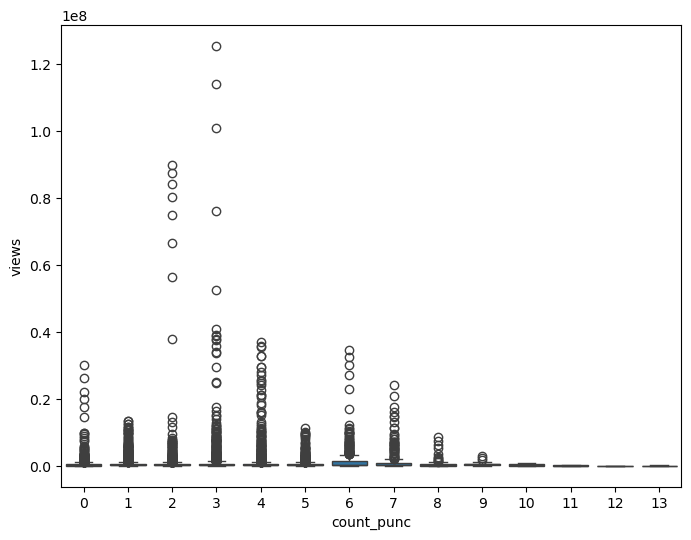

In [127]:
plt.figure(figsize= (8,6))
sns.boxplot(x='count_punc' , y = 'views' , data=sample)
plt.show()

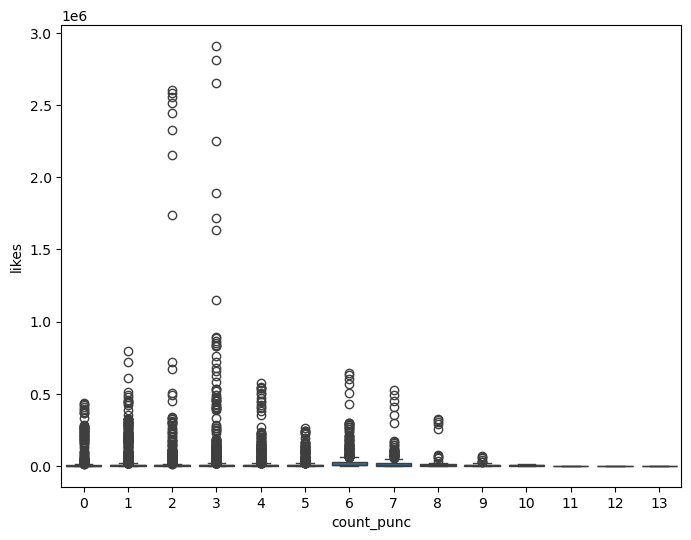

In [128]:
plt.figure(figsize= (8,6))
sns.boxplot(x='count_punc' , y = 'likes' , data=sample)
plt.show()